In [151]:
#Tim Altemus, Michael Austin, Han Bui

import statistics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm
from sklearn import cluster

%matplotlib inline
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths' : 0}

In [152]:
#appending letters for each bin

def createAPBin():
    binPA = []
    for x in df.AffectedPercentage:
        if x > 70:
            binPA.append('I')
        elif x > 60:
            binPA.append('H')
        elif x > 50:
            binPA.append('G')
        elif x > 40:
            binPA.append('F')
        elif x > 30:
            binPA.append('E')
        elif x > 20:
            binPA.append('D')
        elif x > 10:
            binPA.append('C')
        elif x > 0:
            binPA.append('B')
        else:
            binPA.append('A')
    return binPA

def plot_clusters(data, algorithm, args, kwds, xlabel = "x", ylabel = "y", names = [], print_names = False):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c = colors, **plot_kwds)
    frame = plt.gca()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__), fontsize=24))
    
    if print_names:
        if len(names) != 0:
            for i, name in enumerate(names):
                plt.annotate(name, (data[i, 0], data[i, 1]))
                
def dictionary_sum(dictionary):
    total = 0
    for key in dictionary.keys():
        total += dictionary[key]
        
    return total

In [153]:
df = pd.read_csv("harvey.csv")

display(df.info())

df = df[df.PopTotal > 0]

df = df[df.Households > 0]

df = df[df.Occupied > 0]

df = df[df.PopTotal / df.Affected > 1]

df['AffectedPercentage'] = df.Affected / df.PopTotal * 100

# CREATING AFFECTED PERCENTAGE BIN
df['AffectedBin'] = createAPBin()

#MHI: stands for median household income

initialColumns = ['PopTotal', 'White', 'Black', 'Hispanic', 'Indian', 'Asian', 'NativeAmerican', 'Other', 'Mixed', 'Households', 'Occupied', 'MHI', 'Affected', 'Children', 'Seniors', 'AffectedPercentage']

for i in initialColumns:
    print(i, 'Mean:', '%.3f'%(statistics.mean(df[i])) , 'St Dev: ','%.3f'%(statistics.stdev(df[i])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 25 columns):
State             2539 non-null int64
County            2539 non-null int64
Tract             2539 non-null int64
BLKGRP            2539 non-null int64
Geography         2539 non-null object
PopTotal          2539 non-null int64
White             2539 non-null int64
Black             2539 non-null int64
Hispanic          2539 non-null int64
Indian            2539 non-null int64
Asian             2539 non-null int64
NativeAmerican    2539 non-null int64
Other             2539 non-null int64
Mixed             2539 non-null int64
Households        2539 non-null int64
Unoccupied        2539 non-null int64
Occupied          2539 non-null int64
Vacant            2539 non-null int64
MHI               2539 non-null int64
Affected          2539 non-null int64
Children          2539 non-null int64
Seniors           2539 non-null int64
Count_Af_1        2539 non-null int64
Shape_Leng        

None

PopTotal Mean: 2173.390 St Dev:  1948.456
White Mean: 771.751 St Dev:  1063.206
Black Mean: 376.602 St Dev:  591.227
Hispanic Mean: 819.930 St Dev:  801.453
Indian Mean: 4.174 St Dev:  20.283
Asian Mean: 163.950 St Dev:  418.490
NativeAmerican Mean: 1.130 St Dev:  11.454
Other Mean: 4.418 St Dev:  22.407
Mixed Mean: 31.436 St Dev:  60.561
Households Mean: 740.909 St Dev:  596.813
Occupied Mean: 740.909 St Dev:  596.813
MHI Mean: 61698.796 St Dev:  39726.164
Affected Mean: 62.625 St Dev:  102.883
Children Mean: 166.782 St Dev:  205.438
Seniors Mean: 199.936 St Dev:  164.416
AffectedPercentage Mean: 4.340 St Dev:  7.593


In [154]:
popTotal = sum(df['PopTotal'])

popColumns = ['White', 'Black', 'Hispanic', 'Indian', 'Asian', 'NativeAmerican', 'Other', 'Mixed']

for i in popColumns:
    percentage = (sum(df[i]) / popTotal)
    percentage = '%.2f'%(float(percentage)*100)
    print(i, 'percentage:', percentage, '%')

White percentage: 35.51 %
Black percentage: 17.33 %
Hispanic percentage: 37.73 %
Indian percentage: 0.19 %
Asian percentage: 7.54 %
NativeAmerican percentage: 0.05 %
Other percentage: 0.20 %
Mixed percentage: 1.45 %


In [155]:
df[['PopTotal', 'Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,PopTotal,Households,Unoccupied,Occupied,Vacant
PopTotal,1.000000,0.956875,0.940517,0.956875,0.259328
Households,0.956875,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.940517,0.992090,1.000000,0.992090,0.455203
Occupied,0.956875,1.000000,0.992090,1.000000,0.339835
Vacant,0.259328,0.339835,0.455203,0.339835,1.000000


In [156]:
df[['MHI', 'Affected', 'Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,MHI,Affected,Households,Unoccupied,Occupied,Vacant
MHI,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [157]:
df[['White', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,White,MHI,Affected,Households,Unoccupied,Occupied,Vacant
White,1.000000,0.453211,-0.190802,0.771011,0.750424,0.771011,0.153466
MHI,0.453211,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.190802,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.771011,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.750424,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.771011,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.153466,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [158]:
df[['Black', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,Black,MHI,Affected,Households,Unoccupied,Occupied,Vacant
Black,1.000000,-0.136720,0.145845,0.522868,0.526884,0.522868,0.238770
MHI,-0.136720,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,0.145845,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.522868,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.526884,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.522868,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.238770,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [159]:
df[['Hispanic', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,Hispanic,MHI,Affected,Households,Unoccupied,Occupied,Vacant
Hispanic,1.000000,-0.232042,-0.018740,0.524969,0.518594,0.524969,0.161746
MHI,-0.232042,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.018740,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.524969,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.518594,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.524969,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.161746,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [160]:
df[['Indian', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,Indian,MHI,Affected,Households,Unoccupied,Occupied,Vacant
Indian,1.000000,0.048216,-0.055114,0.283762,0.276259,0.283762,0.057037
MHI,0.048216,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.055114,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.283762,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.276259,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.283762,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.057037,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [161]:
df[['Asian', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,Asian,MHI,Affected,Households,Unoccupied,Occupied,Vacant
Asian,1.000000,0.215121,-0.091156,0.650993,0.635739,0.650993,0.145518
MHI,0.215121,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.091156,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.650993,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.635739,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.650993,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.145518,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [162]:
df[['NativeAmerican', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,NativeAmerican,MHI,Affected,Households,Unoccupied,Occupied,Vacant
NativeAmerican,1.000000,0.005899,-0.021270,0.072154,0.070842,0.072154,0.018963
MHI,0.005899,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.021270,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.072154,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.070842,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.072154,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.018963,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [163]:
df[['Other', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,Other,MHI,Affected,Households,Unoccupied,Occupied,Vacant
Other,1.000000,0.070739,-0.034731,0.192849,0.190842,0.192849,0.061927
MHI,0.070739,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.034731,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.192849,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.190842,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.192849,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.061927,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


In [164]:
df[['Mixed', 'MHI', 'Affected','Households', 'Unoccupied', 'Occupied', 'Vacant']].corr()

,Mixed,MHI,Affected,Households,Unoccupied,Occupied,Vacant
Mixed,1.000000,0.189682,-0.107092,0.519732,0.508938,0.519732,0.126552
MHI,0.189682,1.000000,-0.098142,0.184385,0.156466,0.184385,-0.135591
Affected,-0.107092,-0.098142,1.000000,-0.089817,-0.076428,-0.089817,0.064468
Households,0.519732,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Unoccupied,0.508938,0.156466,-0.076428,0.992090,1.000000,0.992090,0.455203
Occupied,0.519732,0.184385,-0.089817,1.000000,0.992090,1.000000,0.339835
Vacant,0.126552,-0.135591,0.064468,0.339835,0.455203,0.339835,1.000000


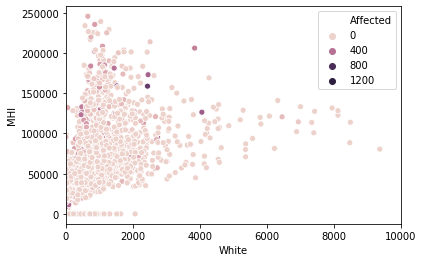

In [165]:
sns.scatterplot(x = 'White', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 10000)
plt.show()


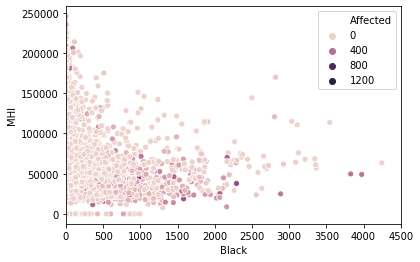

In [166]:
sns.scatterplot(x = 'Black', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 4500)
plt.show()

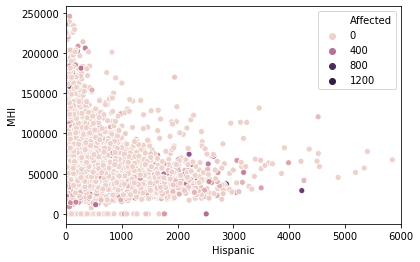

In [167]:
sns.scatterplot(x = 'Hispanic', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 6000)
plt.show()

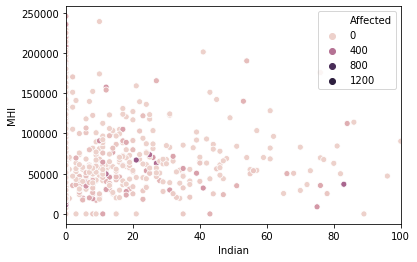

In [168]:
sns.scatterplot(x = 'Indian', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 100)
plt.show()

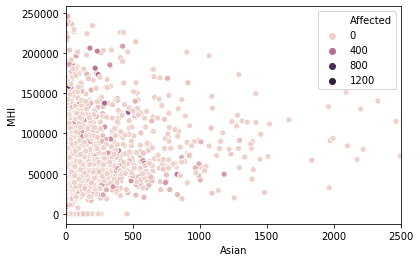

In [169]:
sns.scatterplot(x = 'Asian', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 2500)
plt.show()

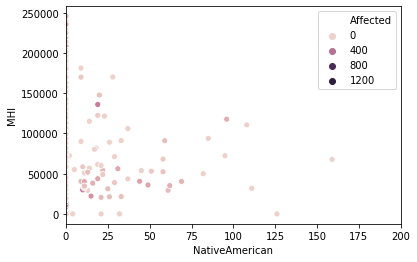

In [170]:
sns.scatterplot(x = 'NativeAmerican', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 200)
plt.show()

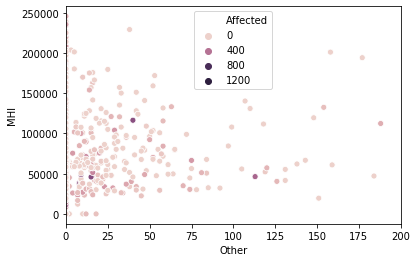

In [171]:
sns.scatterplot(x = 'Other', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 200)
plt.show()

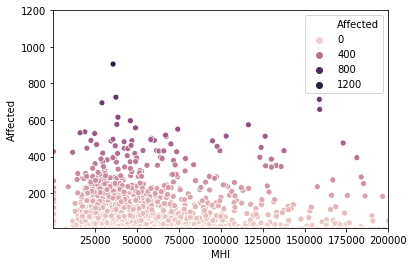

In [172]:
sns.scatterplot(x = 'MHI', y = 'Affected', data=df, hue='Affected')
plt.xlim(10, 200000)
plt.ylim(10, 1200)
plt.show()

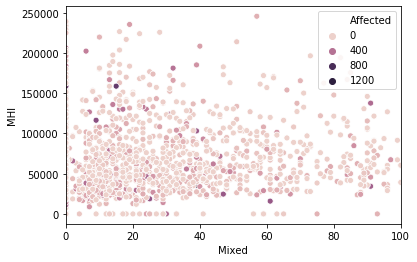

In [173]:
sns.scatterplot(x = 'Mixed', y = 'MHI', data=df, hue='Affected')
plt.xlim(0, 100)
plt.show()

Cluster 0: {'A': 201, 'B': 118, 'C': 20, 'D': 6, 'E': 3, 'I': 1}, Avg MHI: $74,920.16, Average Affected Percentage: 2.37%
Cluster 1: {'A': 16, 'B': 10, 'C': 4, 'D': 2}, Avg MHI: $213,368.29, Average Affected Percentage: 3.55%
Cluster 2: {'A': 101, 'B': 288, 'C': 92, 'D': 24, 'E': 7, 'F': 1, 'G': 1, 'H': 1}, Avg MHI: $26,213.50, Average Affected Percentage: 6.14%
Cluster 3: {'A': 109, 'B': 46, 'C': 5, 'D': 4, 'E': 2, 'F': 2, 'G': 3, 'I': 1}, Avg MHI: $127,536.88, Average Affected Percentage: 3.00%
Cluster 4: {'A': 269, 'B': 175, 'C': 39, 'D': 7, 'E': 1, 'F': 1}, Avg MHI: $56,905.36, Average Affected Percentage: 2.71%
Cluster 5: {'A': 142, 'B': 77, 'C': 19, 'D': 3, 'E': 2, 'G': 1}, Avg MHI: $97,110.34, Average Affected Percentage: 2.70%
Cluster 6: {'A': 36, 'B': 28, 'C': 16, 'D': 2, 'E': 1, 'F': 1}, Avg MHI: $1,173.36, Average Affected Percentage: 4.53%
Cluster 7: {'A': 45, 'B': 21, 'C': 7, 'D': 3, 'E': 3}, Avg MHI: $166,048.36, Average Affected Percentage: 3.59%
Cluster 8: {'A': 208, 'B

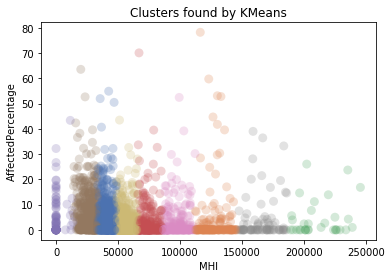

In [174]:
data = df[['MHI', 'AffectedPercentage']].to_numpy()
binPA = list(df.AffectedBin)

plot_clusters(data, cluster.KMeans, (), {'n_clusters' : 9}, 'MHI', 'AffectedPercentage', binPA)
labels = cluster.KMeans(n_clusters=9, random_state=0).fit(data)

# FIND AVERAGE MHI PER CLUSTER for groups in the cluster that were affected by over 10 percent (remove A's and B's)

cluster_data = { 0 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0}, 1 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0}, 2 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0}, 3 : {'total' : 0, 'total_mhi' : 0 , 'total_affected_%' : 0}, 4 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0}, 5 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0}, 6 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0}, 7 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0}, 8 : {'total' : 0, 'total_mhi' : 0, 'total_affected_%' : 0} }
cluster_counts = { 0: {}, 1 : {}, 2 : {}, 3 : {}, 4 : {}, 5 : {}, 6 : {}, 7 : {}, 8 : {} }
for i in range(len(labels.labels_)):
    clust = labels.labels_[i]
    point_bin = binPA[i]
    if point_bin in cluster_counts[clust] :
        cluster_counts[clust][point_bin] += 1
        cluster_data[clust]['total'] += 1
        cluster_data[clust]['total_mhi'] += data[i][0]
        cluster_data[clust]['total_affected_%'] += data[i][1]
    else:
        cluster_counts[clust][point_bin] = 1

for clust in cluster_counts:
    cluster_data[clust]['average_mhi'] = cluster_data[clust]['total_mhi'] / cluster_data[clust]['total']
    print('Cluster {}: {}, Avg MHI: ${:,.2f}, Average Affected Percentage: {:,.2f}%'.format(clust, {key : cluster_counts[clust][key] for key in sorted(cluster_counts[clust].keys())}, cluster_data[clust]['average_mhi'], cluster_data[clust]['total_affected_%'] / cluster_data[clust]['total'] ))

In [175]:
#Parses out different values from our clusters

under_50k = 0
over_50k = 0
for clust in cluster_counts :
    print('Average MHI: ${:,.2f}, Total Affected: {}'.format(cluster_data[clust]['average_mhi'], dictionary_sum({ key if key != 'A' and key != 'B' else '' : cluster_counts[clust][key] if key != 'A' and key != 'B' else 0 for key in cluster_counts[clust].keys()})))
    
    if cluster_data[clust]['average_mhi'] < 50000 :
        under_50k += dictionary_sum({ key if key != 'A' and key != 'B' else '' : cluster_counts[clust][key] if key != 'A' and key != 'B' else 0 for key in cluster_counts[clust].keys()})
    else:
        over_50k += dictionary_sum({ key if key != 'A' and key != 'B' else '' : cluster_counts[clust][key] if key != 'A' and key != 'B' else 0 for key in cluster_counts[clust].keys()})

print()

print('Under 50k groups affected by over 10% of population: {}'.format(under_50k))
print('Over 50k groups affected by over 10% of population: {}'.format(over_50k))

Average MHI: $74,920.16, Total Affected: 30
Average MHI: $213,368.29, Total Affected: 6
Average MHI: $26,213.50, Total Affected: 126
Average MHI: $127,536.88, Total Affected: 17
Average MHI: $56,905.36, Total Affected: 48
Average MHI: $97,110.34, Total Affected: 25
Average MHI: $1,173.36, Total Affected: 20
Average MHI: $166,048.36, Total Affected: 13
Average MHI: $40,753.49, Total Affected: 93

Under 50k groups affected by over 10% of population: 239
Over 50k groups affected by over 10% of population: 139


In [176]:
#>10% Affected Population for Blocks $<50K MHI

239 / len(df.loc[df.MHI < 50000])*100

19.96658312447786

In [177]:
#>10% Affected Population for Blocks $>50K MHI

139 / len(df.loc[df.MHI > 50000])*100

10.388639760837071